In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

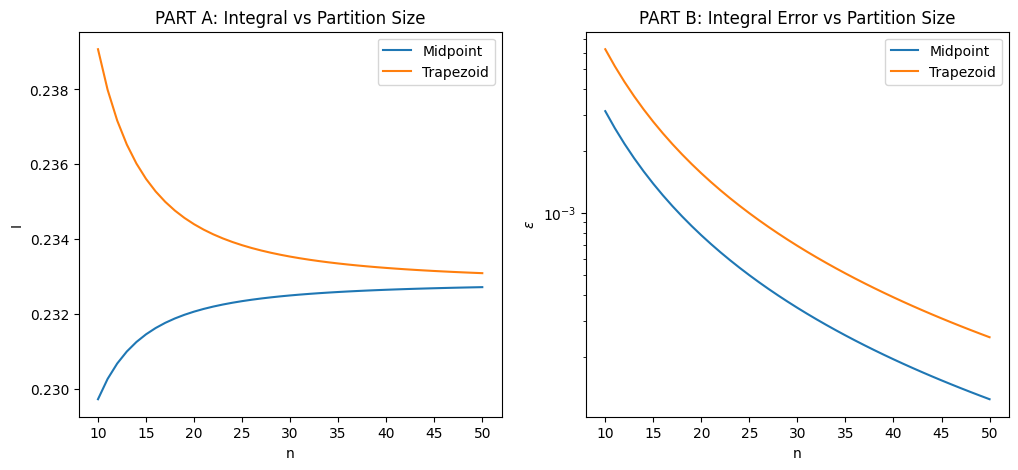

In [14]:
def midpoint(f,a,b,n):
    x = np.linspace(a,b,n+1)
    h = (b-a)/n
    sum = 0
    for i in range(n):
        sum += (f((x[i] + x[i+1]) / 2))
    result = h*sum
    return result

def trapezoid(f,a,b,n):
    x = np.linspace(a,b,n+1)
    h = (b-a)/n
    sum = 0
    for i in range(1,n):
        sum += f(x[i])
    result = h/2 * (f(x[0]) + 2*sum + f(x[n]))
    return result

def f(x):
    return np.exp(-3*x)*np.cos(2*x)

sol_true = 3/13*(1 + np.exp(-3*np.pi/2))

a = 0
b = np.pi/2

nSpan = np.arange(10,51)
sol_mid = np.zeros_like(nSpan,dtype=float)
sol_trp = np.zeros_like(nSpan,dtype=float)
for n in nSpan:
    sol_mid[n-nSpan[0]] = midpoint(f,a,b,n)
    sol_trp[n-nSpan[0]] = trapezoid(f,a,b,n)
err1_mid = abs(sol_mid - sol_true)
err1_trp = abs(sol_trp - sol_true)

fig1,ax1 = plt.subplots(1,2,figsize=(12,5))
ax1[0].plot(nSpan,sol_mid,label='Midpoint')
ax1[0].plot(nSpan,sol_trp,label='Trapezoid')
ax1[0].set_title('PART A: Integral vs Partition Size')
ax1[0].set_xlabel('n')
ax1[0].set_ylabel('I')
ax1[0].legend()
ax1[1].semilogy(nSpan,err1_mid,label='Midpoint')
ax1[1].semilogy(nSpan,err1_trp,label='Trapezoid')
ax1[1].set_title('PART B: Integral Error vs Partition Size')
ax1[1].set_xlabel('n')
ax1[1].set_ylabel(r'$\varepsilon$')
ax1[1].legend()
plt.show()

# Problem 2

In [15]:
def h(t):
  return 2000*np.log(110000 / (110000-1600*t)) - 9.8*t

def t(x):
  return 25/2*(x+1) + 5

[rho,w] = np.polynomial.legendre.leggauss(2)
GL_2pt = 25/2 * (w[0]*h(t(rho[0])) + w[1]*h(t(rho[1])))
print(f'The solution for 2 pt Gauss-Legendre is {GL_2pt:0.8f}')

The solution for 2 pt Gauss-Legendre is 10901.27364565


In [16]:
def gaussQuadrature(f,a,b,n):
  [rho,w] = np.polynomial.legendre.leggauss(n)
  x = 0.5*(1-rho)*a + 0.5*(1+rho)*b
  dx = (b-a)/2.0
  sum_GL = 0
  for i in range(n):
     sum_GL = sum_GL + (w[i]*f(x[i]))
  sum_GL = dx*sum_GL
  return sum_GL

a = 5
b = 30

for n in [4,6,8]:
  int_est = gaussQuadrature(h,a,b,n)
  print(f'The solution using {n} pt Gauss-Legendre is {int_est:0.8f}')

The solution using 4 pt Gauss-Legendre is 10905.39893072
The solution using 6 pt Gauss-Legendre is 10905.39943679
The solution using 8 pt Gauss-Legendre is 10905.39943687


# Problem 3

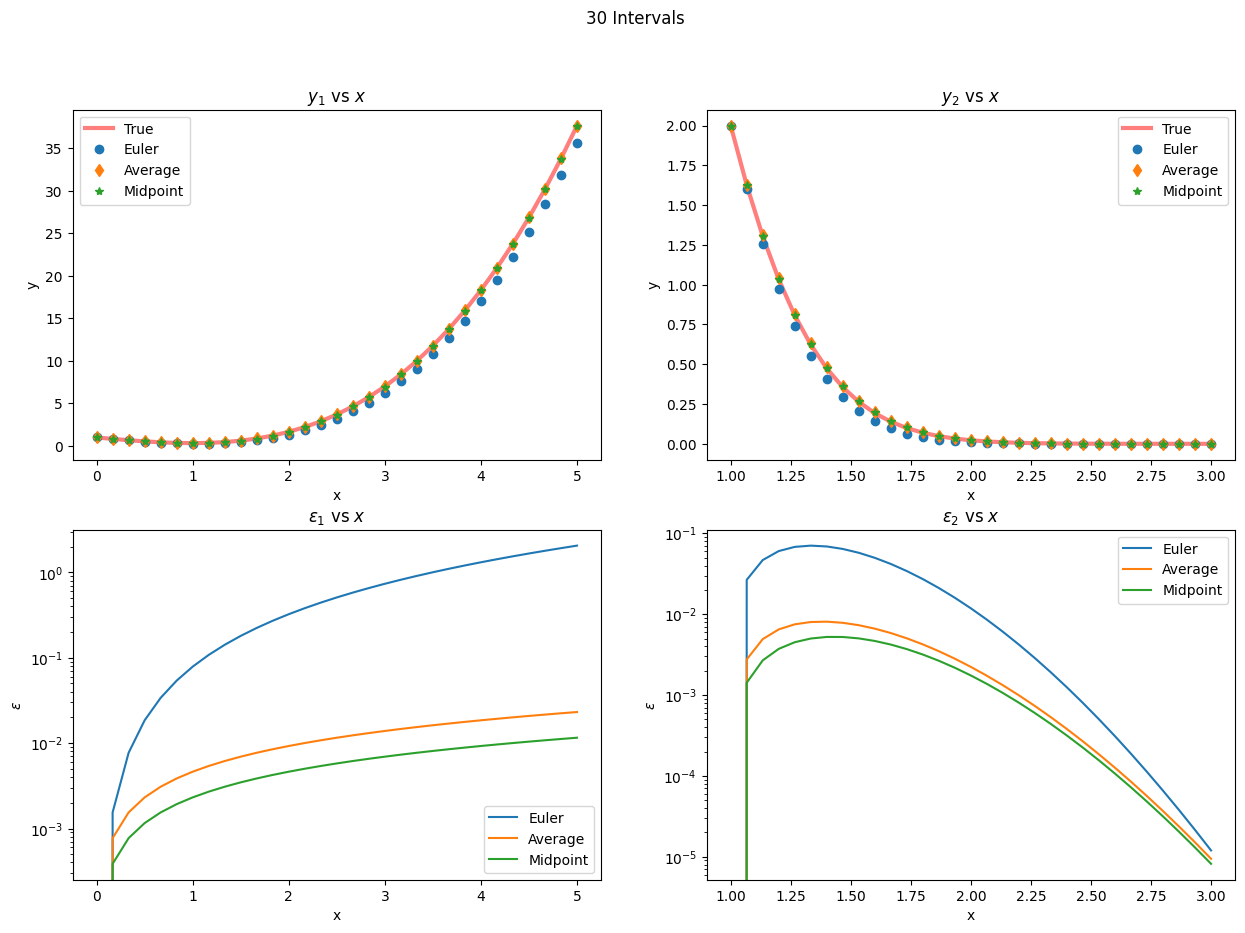

In [17]:
def EulerMethod(f,IC,h,a,b):
  t = np.arange(a,b+h,h)
  y = np.zeros_like(t)
  y[0] = IC
  for i in range(1,len(t)):
    y[i] = y[i-1] + h*f(t[i-1],y[i-1])
  return [t[:-1],y[:-1]]

def EulerMidpoint(f,IC,h,a,b):
  t = np.arange(a,b+h,h)
  y = np.zeros_like(t)
  y[0] = IC
  for i in range(1,len(t)):
    y_mid = y[i-1] + f(t[i-1],y[i-1])*h/2
    y[i] = y[i-1] + f(t[i-1]+h/2,y_mid)*h
  return [t[:-1],y[:-1]]

def EulerAverage(f,IC,h,a,b):
  t = np.arange(a,b+h,h)
  y = np.zeros_like(t)
  y[0] = IC
  for i in range(1,len(t)):
    t_1 = t[i-1]
    t_2 = t[i]
    y_1 = y[i-1]
    y_2 = y_1 + f(t_1,y_1)*h
    dydt_1 = f(t_1,y_1)
    dydt_2 = f(t_2,y_2)
    dydt_avg = (dydt_1+dydt_2)/2
    y[i] = y_1 + dydt_avg*h
  return [t[:-1],y[:-1]]

def f1(x,y):
  return x**2 - 1

def f2(x,y):
  return -3*x*y

def y1_true(x):
  return 1/3*x**3 - x + 1

def y2_true(x):
  return 2*np.exp(-3/2*(x**2-1))

a1 = 0
b1 = 5
IC1 = 1
h30_1 = (b1-a1)/30
h300_1 = (b1-a1)/300

a2 = 1
b2 = 3
IC2 = 2
h30_2 = (b2-a2)/30
h300_2 = (b2-a2)/300

x30_1,y_Eul30_1 = EulerMethod(f1,IC1,h30_1,a1,b1)
_,y_Mid30_1 = EulerMidpoint(f1,IC1,h30_1,a1,b1)
_,y_Avg30_1 = EulerAverage(f1,IC1,h30_1,a1,b1)

x300_1,y_Eul300_1 = EulerMethod(f1,IC1,h300_1,a1,b1)
_,y_Mid300_1 = EulerMidpoint(f1,IC1,h300_1,a1,b1)
_,y_Avg300_1 = EulerAverage(f1,IC1,h300_1,a1,b1)

x30_2,y_Eul30_2 = EulerMethod(f2,IC2,h30_2,a2,b2)
_,y_Mid30_2 = EulerMidpoint(f2,IC2,h30_2,a2,b2)
_,y_Avg30_2 = EulerAverage(f2,IC2,h30_2,a2,b2)

x300_2,y_Eul300_2 = EulerMethod(f2,IC2,h300_2,a2,b2)
_,y_Mid300_2 = EulerMidpoint(f2,IC2,h300_2,a2,b2)
_,y_Avg300_2 = EulerAverage(f2,IC2,h300_2,a2,b2)

err_Eul30_1 = abs(y_Eul30_1 - y1_true(x30_1))
err_Eul300_1 = abs(y_Eul300_1 - y1_true(x300_1))
err_Mid30_1 = abs(y_Mid30_1 - y1_true(x30_1))
err_Mid300_1 = abs(y_Mid300_1 - y1_true(x300_1))
err_Avg30_1 = abs(y_Avg30_1 - y1_true(x30_1))
err_Avg300_1 = abs(y_Avg300_1 - y1_true(x300_1))

err_Eul30_2 = abs(y_Eul30_2 - y2_true(x30_2))
err_Eul300_2 = abs(y_Eul300_2 - y2_true(x300_2))
err_Mid30_2 = abs(y_Mid30_2 - y2_true(x30_2))
err_Mid300_2 = abs(y_Mid300_2 - y2_true(x300_2))
err_Avg30_2 = abs(y_Avg30_2 - y2_true(x30_2))
err_Avg300_2 = abs(y_Avg300_2 - y2_true(x300_2))

fig2,ax2 = plt.subplots(2,2,figsize=(15,10))
ax2[0,0].plot(x30_1,y1_true(x30_1),'r',alpha=0.5,linewidth=3,label='True')
ax2[0,0].plot(x30_1,y_Eul30_1,'o',label='Euler')
ax2[0,0].plot(x30_1,y_Avg30_1,'d',label='Average')
ax2[0,0].plot(x30_1,y_Mid30_1,'*',label='Midpoint')
ax2[0,0].set_title(r'$y_1$ vs $x$')
ax2[0,0].set_xlabel('x')
ax2[0,0].set_ylabel('y')
ax2[0,0].legend()

ax2[0,1].plot(x30_2,y2_true(x30_2),'r',alpha=0.5,linewidth=3,label='True')
ax2[0,1].plot(x30_2,y_Eul30_2,'o',label='Euler')
ax2[0,1].plot(x30_2,y_Avg30_2,'d',label='Average')
ax2[0,1].plot(x30_2,y_Mid30_2,'*',label='Midpoint')
ax2[0,1].set_title(r'$y_2$ vs $x$')
ax2[0,1].set_xlabel('x')
ax2[0,1].set_ylabel('y')
ax2[0,1].legend()

ax2[1,0].semilogy(x30_1,err_Eul30_1,label='Euler')
ax2[1,0].semilogy(x30_1,err_Avg30_1,label='Average')
ax2[1,0].semilogy(x30_1,err_Mid30_1,label='Midpoint')
ax2[1,0].set_title(r'$\varepsilon_1$ vs $x$')
ax2[1,0].set_xlabel('x')
ax2[1,0].set_ylabel(r'$\varepsilon$')
ax2[1,0].legend(loc='lower right')

ax2[1,1].semilogy(x30_2,err_Eul30_2,label='Euler')
ax2[1,1].semilogy(x30_2,err_Avg30_2,label='Average')
ax2[1,1].semilogy(x30_2,err_Mid30_2,label='Midpoint')
ax2[1,1].set_title(r'$\varepsilon_2$ vs $x$')
ax2[1,1].set_xlabel('x')
ax2[1,1].set_ylabel(r'$\varepsilon$')
ax2[1,1].legend()

fig2.suptitle('30 Intervals')
plt.show()

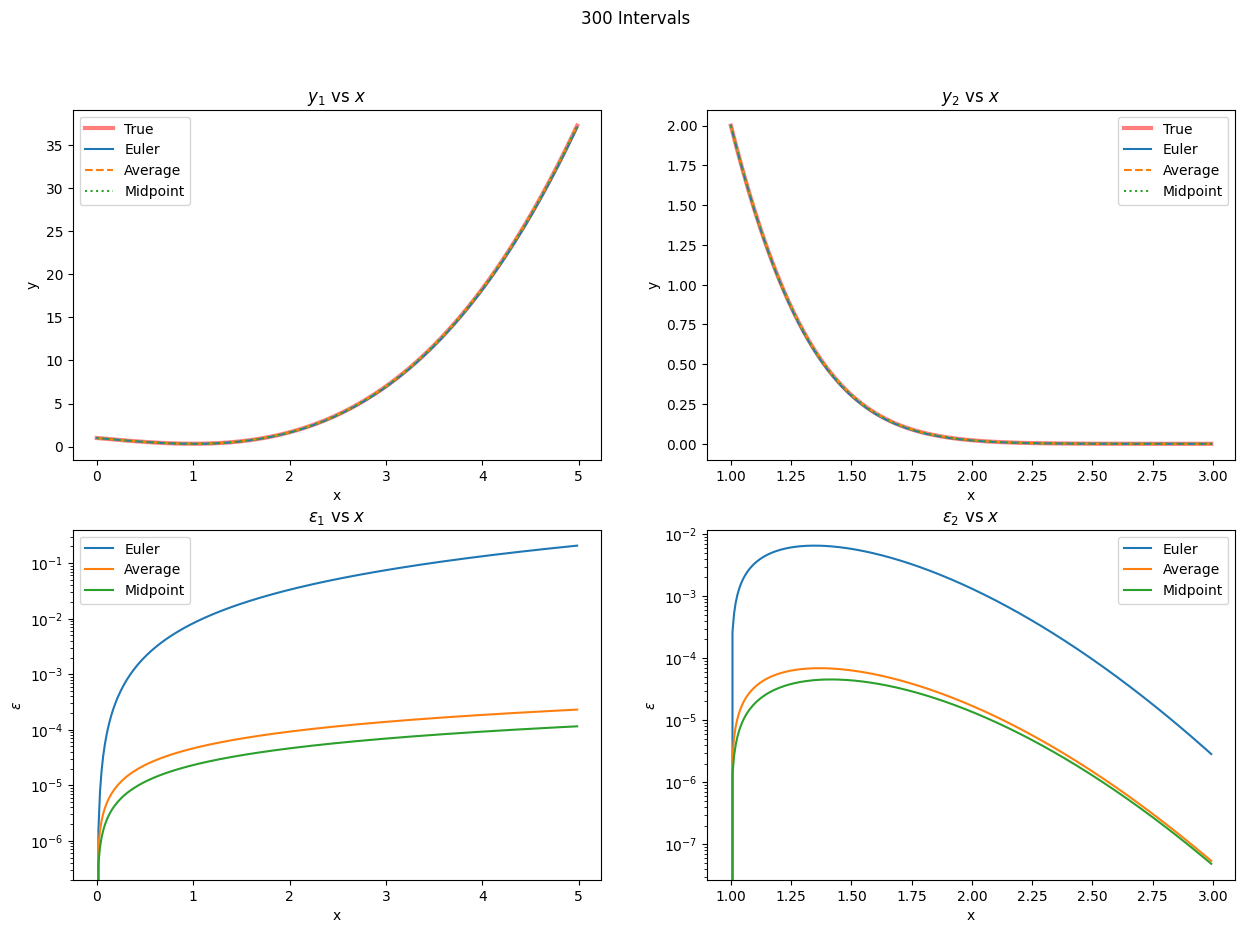

In [18]:
fig3,ax3 = plt.subplots(2,2,figsize=(15,10))
ax3[0,0].plot(x300_1,y1_true(x300_1),'r',alpha=0.5,linewidth=3,label='True')
ax3[0,0].plot(x300_1,y_Eul300_1,'-',label='Euler')
ax3[0,0].plot(x300_1,y_Avg300_1,'--',label='Average')
ax3[0,0].plot(x300_1,y_Mid300_1,':',label='Midpoint')
ax3[0,0].set_title(r'$y_1$ vs $x$')
ax3[0,0].set_xlabel('x')
ax3[0,0].set_ylabel('y')
ax3[0,0].legend()

ax3[0,1].plot(x300_2,y2_true(x300_2),'r',alpha=0.5,linewidth=3,label='True')
ax3[0,1].plot(x300_2,y_Eul300_2,'-',label='Euler')
ax3[0,1].plot(x300_2,y_Avg300_2,'--',label='Average')
ax3[0,1].plot(x300_2,y_Mid300_2,':',label='Midpoint')
ax3[0,1].set_title(r'$y_2$ vs $x$')
ax3[0,1].set_xlabel('x')
ax3[0,1].set_ylabel('y')
ax3[0,1].legend()

ax3[1,0].semilogy(x300_1,err_Eul300_1,label='Euler')
ax3[1,0].semilogy(x300_1,err_Avg300_1,label='Average')
ax3[1,0].semilogy(x300_1,err_Mid300_1,label='Midpoint')
ax3[1,0].set_title(r'$\varepsilon_1$ vs $x$')
ax3[1,0].set_xlabel('x')
ax3[1,0].set_ylabel(r'$\varepsilon$')
ax3[1,0].legend()

ax3[1,1].semilogy(x300_2,err_Eul300_2,label='Euler')
ax3[1,1].semilogy(x300_2,err_Avg300_2,label='Average')
ax3[1,1].semilogy(x300_2,err_Mid300_2,label='Midpoint')
ax3[1,1].set_title(r'$\varepsilon_2$ vs $x$')
ax3[1,1].set_xlabel('x')
ax3[1,1].set_ylabel(r'$\varepsilon$')
ax3[1,1].legend()

fig3.suptitle('300 Intervals')
plt.show()

# Problem 4

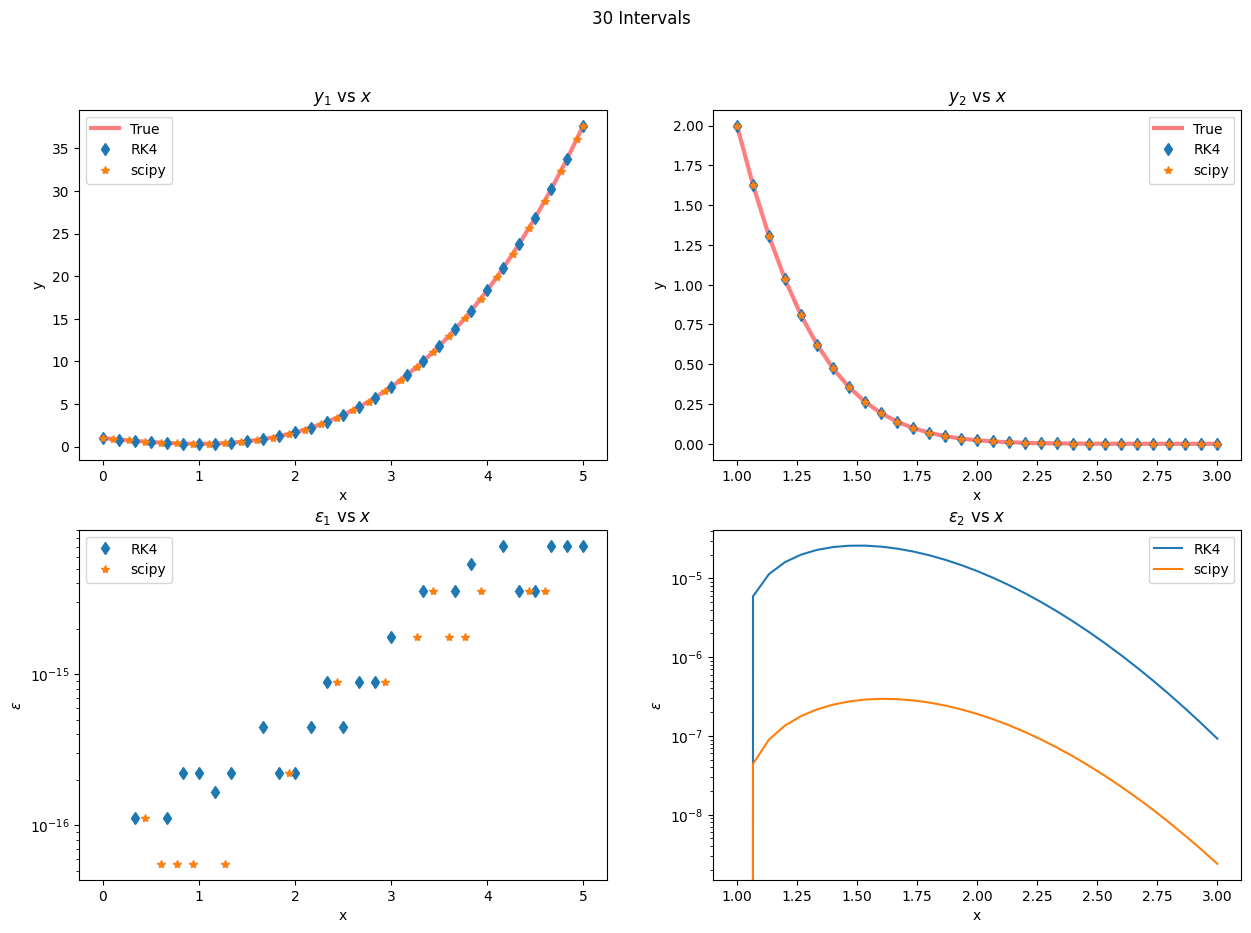

In [19]:
def RK4(f,IC,h,a,b):
  t = np.arange(a,b+h,h)
  y = np.zeros_like(t)
  y[0] = IC
  for i in range(1,len(t)):
    f1 = f(t[i-1], y[i-1])
    f2 = f(t[i-1] + h/2, y[i-1] + h/2*f1)
    f3 = f(t[i-1] + h/2, y[i-1] + h/2*f2)
    f4 = f(t[i-1] + h, y[i-1] + h*f3)
    y[i] = y[i-1] + h*(1/6*f1 + 2/6*f2 + 2/6*f3 + 1/6*f4)
  return [t[:-1],y[:-1]]

sol30_1 = solve_ivp(lambda x, y: x**2 - 1, [a1,b1], [IC1],max_step=h30_1)
sol300_1 = solve_ivp(lambda x, y: x**2 - 1, [a1,b1], [IC1],max_step=h300_1)
sol30_2 = solve_ivp(lambda x, y: -3*x*y, [a2,b2], [IC2],max_step=h30_2)
sol300_2 = solve_ivp(lambda x, y: -3*x*y, [a2,b2], [IC2],max_step=h300_2)
# sol30_1 = solve_ivp(lambda x, y: x**2 - 1, [a1,b1], [IC1],t_eval=x30_1)
# sol300_1 = solve_ivp(lambda x, y: x**2 - 1, [a1,b1], [IC1],t_eval=x300_1)
# sol30_2 = solve_ivp(lambda x, y: -3*x*y, [a2,b2], [IC2],t_eval=x30_2)
# sol300_2 = solve_ivp(lambda x, y: -3*x*y, [a2,b2], [IC2],t_eval=x300_2)

x30_1,y_RK30_1 = RK4(f1,IC1,h30_1,a1,b1)
x300_1,y_RK300_1 = RK4(f1,IC1,h300_1,a1,b1)
x30_2,y_RK30_2 = RK4(f2,IC2,h30_2,a2,b2)
x300_2,y_RK300_2 = RK4(f2,IC2,h300_2,a2,b2)

err30_scipy_1 = abs(sol30_1.y[0] - y1_true(sol30_1.t))
err300_scipy_1 = abs(sol300_1.y[0] - y1_true(sol300_1.t))
err30_scipy_2 = abs(sol30_2.y[0] - y2_true(sol30_2.t))
err300_scipy_2 = abs(sol300_2.y[0] - y2_true(sol300_2.t))

err_RK30_1 = abs(y_RK30_1 - y1_true(x30_1))
err_RK300_1 = abs(y_RK300_1 - y1_true(x300_1))
err_RK30_2 = abs(y_RK30_2 - y2_true(x30_2))
err_RK300_2 = abs(y_RK300_2 - y2_true(x300_2))

fig4,ax4 = plt.subplots(2,2,figsize=(15,10))
ax4[0,0].plot(x30_1,y1_true(x30_1),'r',alpha=0.5,linewidth=3,label='True')
ax4[0,0].plot(x30_1,y_RK30_1,'d',label='RK4')
ax4[0,0].plot(sol30_1.t,sol30_1.y[0],'*',label='scipy')
ax4[0,0].set_title(r'$y_1$ vs $x$')
ax4[0,0].set_xlabel('x')
ax4[0,0].set_ylabel('y')
ax4[0,0].legend()

ax4[0,1].plot(x30_2,y2_true(x30_2),'r',alpha=0.5,linewidth=3,label='True')
ax4[0,1].plot(x30_2,y_RK30_2,'d',label='RK4')
ax4[0,1].plot(sol30_2.t,sol30_2.y[0],'*',label='scipy')
ax4[0,1].set_title(r'$y_2$ vs $x$')
ax4[0,1].set_xlabel('x')
ax4[0,1].set_ylabel('y')
ax4[0,1].legend()

ax4[1,0].semilogy(x30_1,err_RK30_1,'d',label='RK4')
ax4[1,0].semilogy(sol30_1.t,err30_scipy_1,'*',label='scipy')
ax4[1,0].set_title(r'$\varepsilon_1$ vs $x$')
ax4[1,0].set_xlabel('x')
ax4[1,0].set_ylabel(r'$\varepsilon$')
ax4[1,0].legend()

ax4[1,1].semilogy(x30_2,err_RK30_2,label='RK4')
ax4[1,1].semilogy(sol30_2.t,err30_scipy_2,label='scipy')
ax4[1,1].set_title(r'$\varepsilon_2$ vs $x$')
ax4[1,1].set_xlabel('x')
ax4[1,1].set_ylabel(r'$\varepsilon$')
ax4[1,1].legend()

fig4.suptitle('30 Intervals')
plt.show()

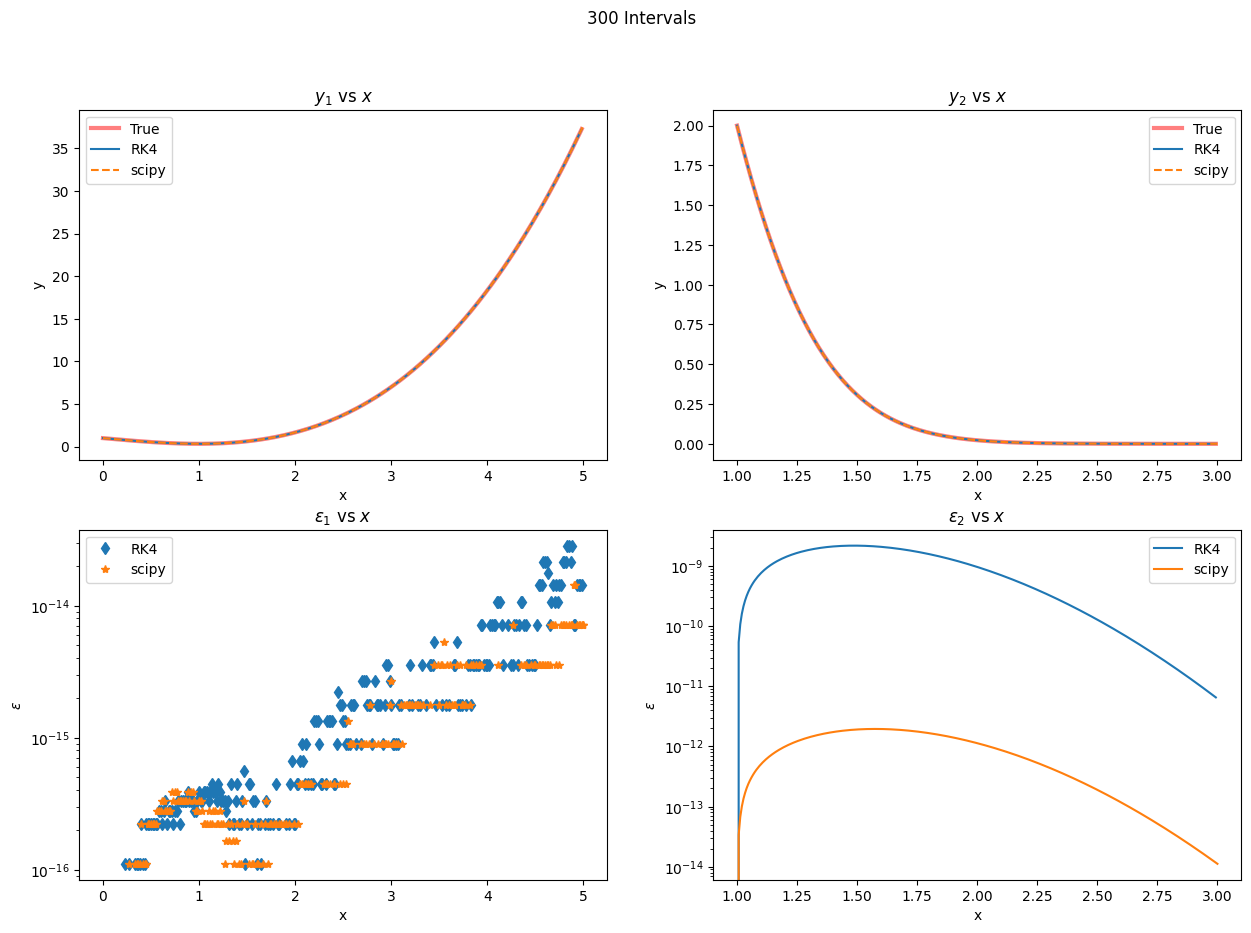

In [20]:
fig4,ax4 = plt.subplots(2,2,figsize=(15,10))
ax4[0,0].plot(x300_1,y1_true(x300_1),'r',alpha=0.5,linewidth=3,label='True')
ax4[0,0].plot(x300_1,y_RK300_1,'-',label='RK4')
ax4[0,0].plot(sol300_1.t,sol300_1.y[0],'--',label='scipy')
ax4[0,0].set_title(r'$y_1$ vs $x$')
ax4[0,0].set_xlabel('x')
ax4[0,0].set_ylabel('y')
ax4[0,0].legend()

ax4[0,1].plot(x300_2,y2_true(x300_2),'r',alpha=0.5,linewidth=3,label='True')
ax4[0,1].plot(x300_2,y_RK300_2,'-',label='RK4')
ax4[0,1].plot(sol300_2.t,sol300_2.y[0],'--',label='scipy')
ax4[0,1].set_title(r'$y_2$ vs $x$')
ax4[0,1].set_xlabel('x')
ax4[0,1].set_ylabel('y')
ax4[0,1].legend()

ax4[1,0].semilogy(x300_1,err_RK300_1,'d',label='RK4')
ax4[1,0].semilogy(sol300_1.t,err300_scipy_1,'*',label='scipy')
ax4[1,0].set_title(r'$\varepsilon_1$ vs $x$')
ax4[1,0].set_xlabel('x')
ax4[1,0].set_ylabel(r'$\varepsilon$')
ax4[1,0].legend()

ax4[1,1].semilogy(x300_2,err_RK300_2,label='RK4')
ax4[1,1].semilogy(sol300_2.t,err300_scipy_2,label='scipy')
ax4[1,1].set_title(r'$\varepsilon_2$ vs $x$')
ax4[1,1].set_xlabel('x')
ax4[1,1].set_ylabel(r'$\varepsilon$')
ax4[1,1].legend()

fig4.suptitle('300 Intervals')
plt.show()